In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#資料讀取
train=pd.read_csv('C:/Users/USER/Desktop/DT/sales_train.csv',parse_dates= ['date'])
items=pd.read_csv('C:/Users/USER/Desktop/DT/items.csv')
shops=pd.read_csv('C:/Users/USER/Desktop/DT/shops.csv')
categories=pd.read_csv('C:/Users/USER/Desktop/DT/item_categories.csv')
test=pd.read_csv('C:/Users/USER/Desktop/DT/test.csv')

In [3]:
#資料合併
train = pd.merge(train, items, on='item_id', how='inner')
train = pd.merge(train, categories, on='item_category_id', how='inner')
train = pd.merge(train, shops, on='shop_id', how='inner')

test = pd.merge(test, items, on='item_id', how='inner')
test = pd.merge(test, categories, on='item_category_id', how='inner')
test = pd.merge(test, shops, on='shop_id', how='inner')


In [4]:
print(train.shape)
train.head()

(2935849, 10)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-02-01,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-04-26,3,59,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,2013-06-26,5,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,2013-07-20,6,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,2013-09-14,8,59,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""


In [5]:
#資料資訊
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   shop_id             int64         
 3   item_id             int64         
 4   item_price          float64       
 5   item_cnt_day        float64       
 6   item_name           object        
 7   item_category_id    int64         
 8   item_category_name  object        
 9   shop_name           object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 246.4+ MB


In [44]:
#每欄獨特值個數
print('Unique values per column')
for i in train.columns:
    print(i , len(train[i].unique()))
    

Unique values per column
date 1034
date_block_num 34
shop_id 60
item_id 21807
item_price 19993
item_cnt_day 198
item_name 21807
item_category_id 84
item_category_name 84
shop_name 60


C:\Users\USER\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Item Cnt Day')

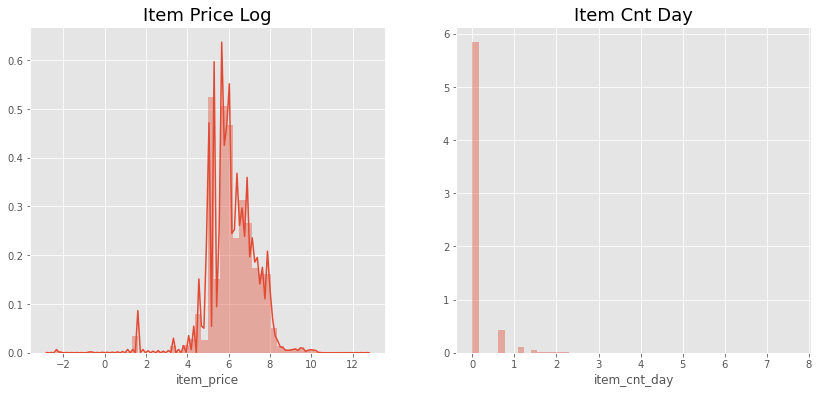

In [19]:
#價格銷售量對數分配
plt.figure(figsize=(14,6))

plt.subplot(121)
g1=sns.distplot(np.log(train['item_price']))
g1.set_title("Item Price Log", fontsize=18)

plt.subplot(122)
g2=sns.distplot(np.log(train[train['item_cnt_day']>0]['item_cnt_day']))
g2.set_title('Item Cnt Day' , fontsize=18)

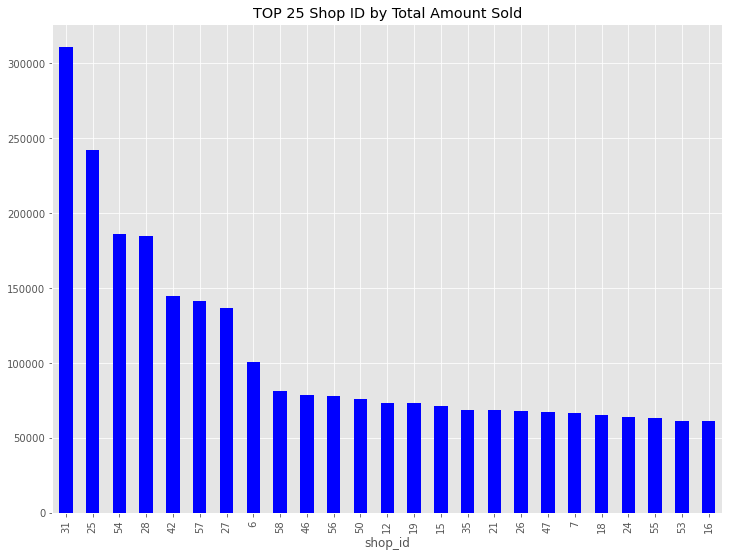

In [60]:
#商店銷售量排行前25名
plt.figure(figsize=(12,9))

shop_cnt_day=train['item_cnt_day'].groupby(train.shop_id).sum()
shop_cnt_day.sort_values(ascending=False).head(25).plot(kind='bar',color='Blue',title='TOP 25 Shop ID by Total Amount Sold')